# Exercise 5.1: The Volumes of Hyperspheres

An $n$-dimensional sphere ($n$-sphere), also known as an $n$-ball, is the region of space comprising all points within a fixed distance, called the radius, from a given point. 

In this example we wish to calculate the volume of an $n$-ball with unit radius, centered at the origin, for various values of $n$. 

For $n=0$ dimensions, the volume is defined to be $V_0 = 1$. Ine one dimension, the volume is simply $V_1 = 2$. 

To calculate the volumes in higher dimensions, we will use the Monte Carlo integration technique, generalizing the formula we used to obtain an approximation to $\pi$: 


$V_n = \int \mathrm{d}^n x ~\theta(1 - \sum_{i=1}^n x_i^2)$,

so for example, the volume of a 2-ball (a circle) is simply:

$V_2 = 4 \int_{0}^1 \mathrm{d} x_1 \int_{0}^1 \mathrm{d} x_2  ~\theta(1 - x_1^2 - x_2^2)$.

We expect this to be = $\pi$! The procedure to obtain this result was examined in Example 5.4. We will generalize this to $n$ dimensions. 

(a) Start by calculating the volume of an $3$-dimensional sphere, for which we expect the result $V_3 = \frac{4}{3} \pi$: 

$V_3 = 2^3 \int_{0}^1 \mathrm{d} x_1 \int_{0}^1 \mathrm{d} x_2 \int_{0}^1 \mathrm{d} x_3  ~\theta(1 - x_1^2 - x_2^2 - x_3^2)$.


(b) Generalize your code to handle any number of dimensions, and calculate the volumes of $n$-balls up to $n=30$ using:

$V_n = 2^n \int_{0}^1 \mathrm{d} x_1 \int_{0}^1 \mathrm{d} x_2 \int_{0}^1 ... \mathrm{d} x_n ~\theta(1 - \sum_{i=1}^n x_i^2)$. 

(c) Graph the result. 

BONUS 10%:

(d) Add the analytical results to your graph, given for the unit sphere, by:

$V_n = \frac{\pi^{n/2}}{\Gamma(\frac{n}{2}+1)}$, where $\Gamma$ is the Euler Gamma function. 

You may use the scipy special function: 

```scipy.special.gamma``` which represents the $\Gamma$ function. 

## Solution (a)

In [32]:
import random

def theta(x,y,z):
    if x**2+y**2+z**2 < 1:
        return 1
    else:
        return 0
    
N = 100000 # number of sample points
sum = 0
for i in range(N):
    x = random.random()
    y = random.random()
    z = random.random()
    sum = sum + theta(x,y,z)
    
volume = 8/N*sum
print(volume)

4.20192


## Solution (b)

In [209]:
def theta(coordinates): # takes a list of coordinates, returns 1 if the point is within the n-sphere and returns 0 if else
    distance = 0
    for xi in coordinates:
        distance = distance + xi**2
    if distance < 1:
        return 1
    else:
        return 0
    
def volume(d, N): # calculates the volume of a d-sphere via Monte Carlo integration with N sample points
    sum = 0 # counts the number of sample points that lie in the sphere
    for n in range(N):
        coordinates = [] # contains the coordinates of a randomly generated point
        for xi in range(d):
            coordinates.append(random.random()) # generates a coordinate between 0 and 1
        sum = sum + theta(coordinates)
    volume = 2**d*sum/N
    return volume

results = [] # will hold the volumes of the first 30 n-balls in order of increasing n
for n in range(31):
    results.append(volume(n,10000))


## Solution (c)

[Text(0, 0, '0'),
 Text(5, 0, '5'),
 Text(10, 0, '10'),
 Text(15, 0, '15'),
 Text(20, 0, '20'),
 Text(25, 0, '25'),
 Text(30, 0, '30')]

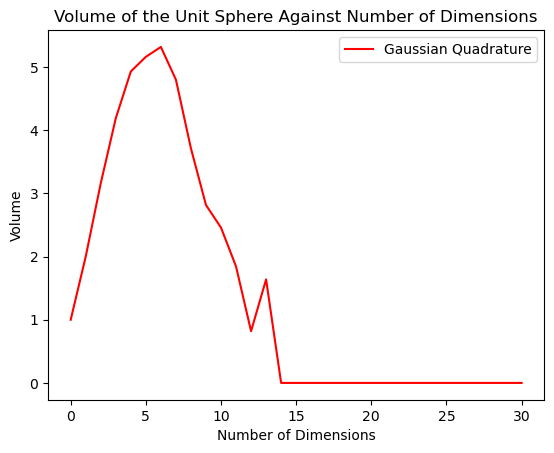

In [210]:
from matplotlib import pyplot as plt

numbers = [0,5,10,15,20,25,30]

fig, axes = plt.subplots() # creates the plot axes
    
axes.plot(range(31), results, color='red', label='Gaussian Quadrature') 
axes.legend()
axes.set_title("Volume of the Unit Sphere Against Number of Dimensions")
axes.set_xlabel("Number of Dimensions")
axes.set_ylabel("Volume")
axes.set_xticks(numbers)
axes.set_xticklabels(numbers)